In [2]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%run utils/stat_helper_functions

packages imported


In [3]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_data_16-Sep-2020.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()


,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total
0,20,Perfused,38.8500,227.1291,0.6387,139.1259,1314.7003,1.0000,1.0000
1,20,Perfused,89.4167,168.2462,0.6933,136.3860,1017.1449,0.7556,0.9575
2,20,Perfused,107.7833,173.7650,0.6744,164.8434,1013.9591,0.6457,0.9920
3,20,Perfused,125.0500,140.5920,0.6299,163.8482,988.7944,0.5256,0.8230
4,20,Perfused,142.5333,156.3240,0.6410,191.1523,1109.3393,0.5009,0.8157


In [7]:
# apply linear regression for each rat to get atp2pi and atp2total slopes
lm_total = LinearRegression()
lm_pi = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope_atp2total', 'intercept_atp2total', 'slope_atp2pi', 'intercept_atp2pi'], index=rats)

# linear regression
for rat in rats:
    df_rat = df[df['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    # atp2total
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm_total.fit(t_hr,y)
    # atp2pi
    y = df_rat['atp2pi'].values.reshape(-1,1)
    lm_pi.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort,
                           -lm_total.coef_[0][0], lm_total.intercept_[0],
                           -lm_pi.coef_[0][0], lm_pi.intercept_[0]] 
df_summary.head()

# # linear regression for atp2pi
# for rat in rats:
#     df_rat = df[df['rat'] == rat]
#     t_hr = df_rat['t_min'].values.reshape(-1,1)/60
#     y = df_rat['atp2pi'].values.reshape(-1,1)
#     lm.fit(t_hr,y)
#     cohort = df[df['rat']==rat]['cohort'].unique()[0]
#     df_summary.loc[rat] = [cohort, -lm.coef_[0][0], lm.intercept_[0]] 
# df_summary.head()

,cohort,slope_atp2total,intercept_atp2total,slope_atp2pi,intercept_atp2pi
20,Perfused,0.119336,1.1124,0.244855,1.10789
21,Perfused,0.0724859,1.04271,0.363678,1.18243
22,Perfused,0.0527831,1.01574,0.183726,0.949819
23,Cold,0.0422051,1.08675,0.152187,1.08971
24,Cold,0.188819,1.23942,0.277078,1.04911


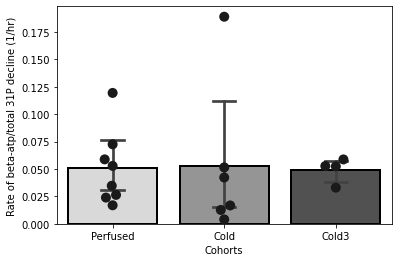

In [9]:
# show lac2pyr barplots for atp2total
ax = sns.barplot(x='cohort', y='slope_atp2total', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2total',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

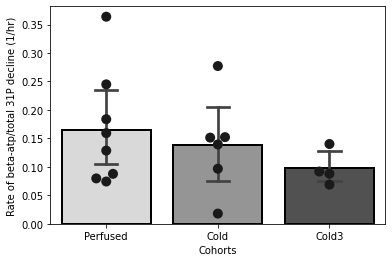

In [10]:
# show lac2pyr barplots for atp2pi
ax = sns.barplot(x='cohort', y='slope_atp2pi', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2pi',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

In [55]:
df_cold3

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total
103,42,Cold3,56.4333,230.7660,0.7615,185.7309,1528.7327,1.0000,1.0000
104,42,Cold3,73.5833,203.6003,0.6933,245.0477,1509.4532,0.6687,0.8935
105,42,Cold3,276.4833,186.5333,0.6710,282.8328,1505.8318,0.5308,0.8206
106,42,Cold3,293.6333,188.5202,0.6378,317.3614,1604.6226,0.4781,0.7783
107,42,Cold3,310.7833,219.3975,0.6714,345.5307,1685.5456,0.5110,0.8623
108,46,Cold3,39.6333,170.6549,0.7130,78.2612,939.7736,1.0000,1.0000
109,46,Cold3,56.7833,165.5914,0.7113,85.1529,920.7085,0.8918,0.9904
110,46,Cold3,274.0333,142.5908,0.6453,165.6596,965.3028,0.3947,0.8135
111,46,Cold3,308.3500,173.0481,0.6952,245.3717,1306.0954,0.3234,0.7296
112,46,Cold3,291.2000,142.4937,0.6482,155.0880,962.9891,0.4214,0.8149


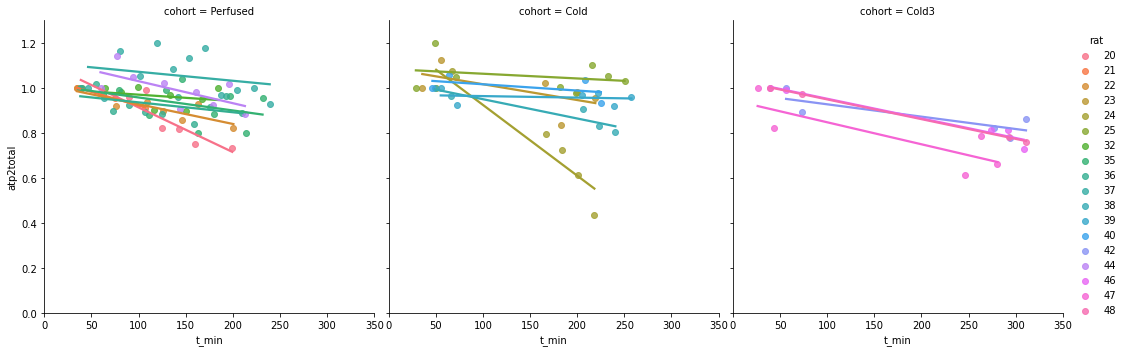

In [11]:
# look at individual decline of atp2total vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2total',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

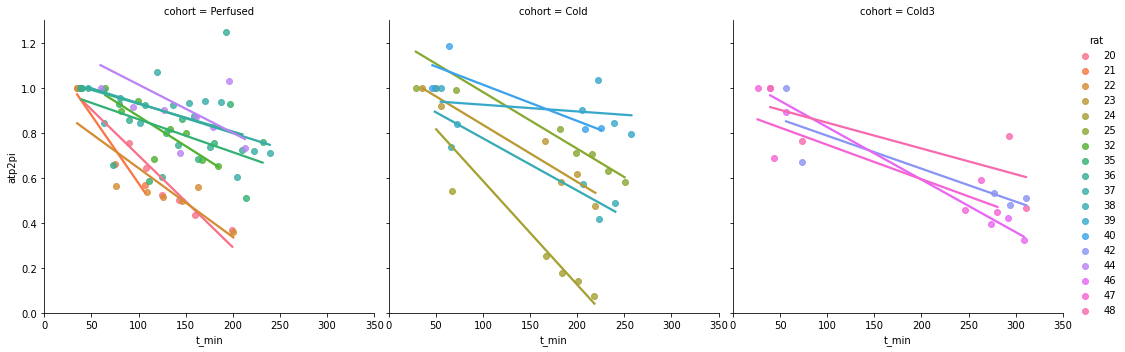

In [12]:
# look at individual decline of atp2pi vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2pi',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()